Import required libaries

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Maria\AppData\Local\Temp\ipykernel_6396\3548572284.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Establish database connection

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-GPPFVD7\SERVER1;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

Define SQL query

In [3]:
query = 'SELECT AnnualSales, SquareFeet, NumberEmployees FROM Sales.vStoreWithDemographics'

Fetch data from SQL database

In [4]:
salesdata = pd.read_sql(query, conn)

C:\Users\Maria\AppData\Local\Temp\ipykernel_6396\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


Calculate correlation coefficient

In [5]:
correlation = salesdata['SquareFeet'].corr(salesdata['NumberEmployees'])

Plot scatter plot

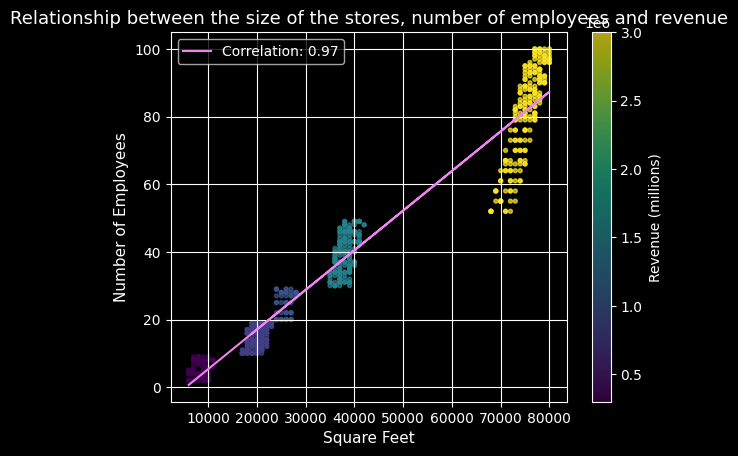

In [8]:
plt.style.use('dark_background')
plt.scatter(salesdata['SquareFeet'], salesdata['NumberEmployees'], c=salesdata['AnnualSales'], cmap='viridis', alpha=0.7, s=8)
plt.colorbar(label='Revenue (millions)')
plt.title('Relationship between the size of the stores, number of employees and revenue', fontsize=13)
plt.xlabel('Square Feet', fontsize=11)
plt.ylabel('Number of Employees', fontsize=11)
plt.grid(True)
m, b = np.polyfit(salesdata['SquareFeet'], salesdata['NumberEmployees'], 1)
plt.plot(salesdata['SquareFeet'], m * salesdata['SquareFeet'] + b, color='violet', label=f'Correlation: {correlation:.2f}')
plt.legend()

plt.show()

Add a line of best fit